In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
import pandas as pd
from PIL import Image, ImageDraw
from surface_crns import SurfaceCRNQueueSimulator
from surface_crns.models.grids import SquareGrid
from surface_crns.readers.manifest_readers import read_manifest
from surface_crns.options.option_processor import SurfaceCRNOptionParser
from surface_crns.simulators.queue_simulator import QueueSimulator

pygame 2.6.0 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
def ManifestInitWriter(name, microstructure):
    im = microstructure.astype(int)
    
    with open(name, 'w') as outfile:
        for row in range(microstructure.shape[0]):
            for col in range(microstructure.shape[1]):
                if im[row, col] == 1:
                    state = "A"
                else:
                    state = "Q"
                outfile.write(state + " ")
            if row < 200:
                outfile.write("\n")

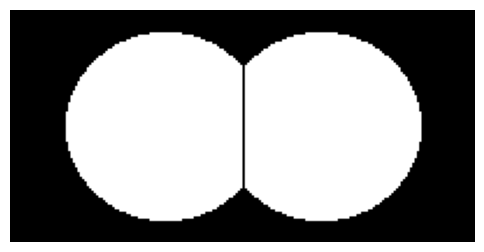

Initial condition unit cell created
Manifest written


In [5]:
im = Image.new('RGB', (200, 100), (0, 0, 0))
draw = ImageDraw.Draw(im)
draw.ellipse(xy = (24, 10, 109, 90),
            fill = (255, 255, 255, 255),
            outline = (255, 255, 255),
            width = 0)

draw.ellipse(xy = (91, 10, 176, 90),
        fill = (255, 255, 255, 255),
        outline = (255, 255, 255),
        width = 0)

draw.ellipse(xy = (100, 24, 100, 76),
    fill = (0, 0, 0),
    outline = (0, 0, 0),
    width = 0)

plt.subplots(1, 1, figsize=(6, 6))
plt.axis('off')
fig = plt.imshow(im, cmap='gist_stern')
plt.show()

imgray = im.convert('L')
imarray = np.array(imgray)
imarray[imarray == 255] = 1
imarray = imarray.astype('bool')

# Create init file
print('Initial condition unit cell created')
ManifestInitWriter('GR_graincontact_init.txt', imarray)

manifest_filename = "GR_graincontact_manifest.txt"
with open(manifest_filename, 'w') as outfile:
    header = '''# Run settings
pixels_per_node    = 3
speedup_factor     = 50
rng_seed           = 123123123
max_duration       = 3000
node_display       = Color
wrap               = True

# Transition rules
!START_TRANSITION_RULES
#A + Q -> R + A (1)
#A -> R (0.6)
#R -> Q (0.3)
A + Q -> R + R (0.4)
R + R -> A + Q (0.01)
R + Q -> Q + R (1)
!END_TRANSITION_RULES

!START_COLORMAP
Q: (230,230,230)
A: (255, 0, 0)
R: (0, 100, 255)
!END_COLORMAP


!START_INIT_STATE
!INCLUDE GR_graincontact_init.txt
!END_INIT_STATE'''
    outfile.write(header)
    
print('Manifest written')

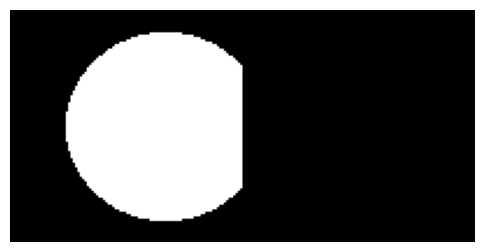

Initial condition unit cell created
Manifest written


In [8]:
im = Image.new('RGB', (200, 100), (0, 0, 0))
draw = ImageDraw.Draw(im)
draw.ellipse(xy = (24, 10, 109, 90),
            fill = (255, 255, 255, 255),
            outline = (255, 255, 255),
            width = 0)

draw.rectangle(xy = (100, 24, 110, 76),
    fill = (0, 0, 0),
    outline = (0, 0, 0),
    width = 0)

plt.subplots(1, 1, figsize=(6, 6))
plt.axis('off')
fig = plt.imshow(im, cmap='gist_stern')
plt.show()

imgray = im.convert('L')
imarray = np.array(imgray)
imarray[imarray == 255] = 1
imarray = imarray.astype('bool')

# Create init file
print('Initial condition unit cell created')
ManifestInitWriter('GR_graincontact_left_init.txt', imarray)

manifest_filename = "GR_graincontact_left_manifest.txt"
with open(manifest_filename, 'w') as outfile:
    header = '''# Run settings
pixels_per_node    = 3
speedup_factor     = 50
rng_seed           = 123123123
max_duration       = 3000
node_display       = Color
wrap               = True

# Transition rules
!START_TRANSITION_RULES
#A + Q -> R + A (1)
#A -> R (0.6)
#R -> Q (0.3)
A + Q -> R + R (0.4)
R + R -> A + Q (0.01)
R + Q -> Q + R (1)
!END_TRANSITION_RULES

!START_COLORMAP
Q: (230,230,230)
A: (255, 0, 0)
R: (0, 100, 255)
!END_COLORMAP


!START_INIT_STATE
!INCLUDE GR_graincontact_left_init.txt
!END_INIT_STATE'''
    outfile.write(header)
    
print('Manifest written')

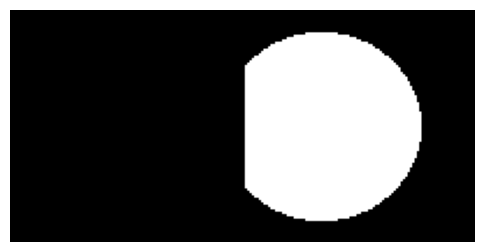

Initial condition unit cell created
Manifest written


In [9]:
im = Image.new('RGB', (200, 100), (0, 0, 0))
draw = ImageDraw.Draw(im)
draw.ellipse(xy = (91, 10, 176, 90),
        fill = (255, 255, 255, 255),
        outline = (255, 255, 255),
        width = 0)

draw.rectangle(xy = (90, 24, 100, 76),
    fill = (0, 0, 0),
    outline = (0, 0, 0),
    width = 0)

plt.subplots(1, 1, figsize=(6, 6))
plt.axis('off')
fig = plt.imshow(im, cmap='gist_stern')
plt.show()

imgray = im.convert('L')
imarray = np.array(imgray)
imarray[imarray == 255] = 1
imarray = imarray.astype('bool')

# Create init file
print('Initial condition unit cell created')
ManifestInitWriter('GR_graincontact_right_init.txt', imarray)

manifest_filename = "GR_graincontact_right_manifest.txt"
with open(manifest_filename, 'w') as outfile:
    header = '''# Run settings
pixels_per_node    = 3
speedup_factor     = 50
rng_seed           = 123123123
max_duration       = 3000
node_display       = Color
wrap               = True

# Transition rules
!START_TRANSITION_RULES
#A + Q -> R + A (1)
#A -> R (0.6)
#R -> Q (0.3)
A + Q -> R + R (0.4)
R + R -> A + Q (0.01)
R + Q -> Q + R (1)
!END_TRANSITION_RULES

!START_COLORMAP
Q: (230,230,230)
A: (255, 0, 0)
R: (0, 100, 255)
!END_COLORMAP


!START_INIT_STATE
!INCLUDE GR_graincontact_right_init.txt
!END_INIT_STATE'''
    outfile.write(header)
    
print('Manifest written')

### To-Do
1. Read mask into surface CRN reader function
    - Make new node object, modNode, that can take a modifier value
2. Add modifier/weight value f to tuple grid tuple
    - Use modNode to create new square grid class that includes modifier value for reading
3. Translate mask values to grid points
    - Create new queue simulator that includes mod node vals that multiply rate
4. Test simulations